In [ ]:
#ARIMA : Autoregressive Integrated Moving Average
#Seasonal ARIMA : SARIMA
#SARIMA with Exogenus Variables : SARIMAX

In [ ]:
#Non Seasonal ARIMA models are generally denoted ARIMA(p,d,q) where parameters p,d & q are non negative integers.
#AR (p)- Autoregression - A regression model that utilizes the dependent relationship between a current observation and observations over a previous period.
#I (Integrated) (d) - Differencing of observations- Substracting an observation from an observation at the previous time step. In order to make the time series stationary.
#MA (q) - Moving Average - A model that uses the dependencies between an observation and a residual error from a moving average model applied to lagged observations.

In [ ]:
#A stationary series has constant mean and variance over time.

In [ ]:
#Augmented Dickey Fuller test is used to see stationarity in data.

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline

In [ ]:
from statsmodels.tsa.ar_model import AutoReg, ARResults

In [ ]:
df = pd.read_csv('/content/sample_data/uspopulation.csv',index_col = 'DATE',parse_dates=True)

In [ ]:
df.head()

,PopEst
DATE,
2011-01-01,311037
2011-02-01,311189
2011-03-01,311351
2011-04-01,311522
2011-05-01,311699


<Axes: xlabel='DATE'>

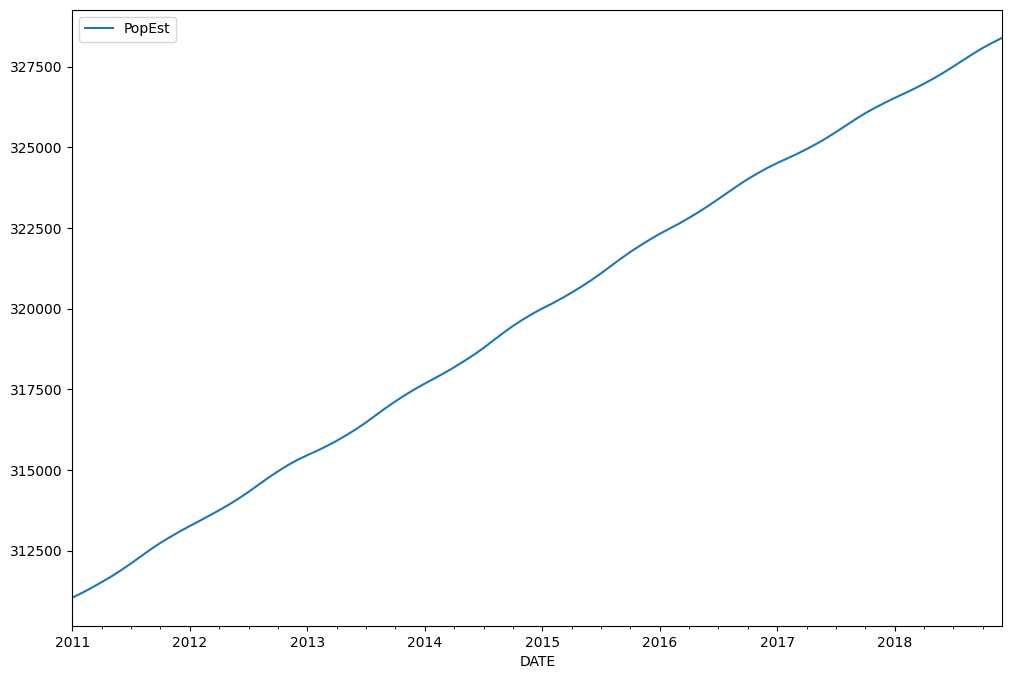

In [ ]:
df.plot(figsize=(12,8))

In [ ]:
train = df.iloc[:84]
test = df.iloc[84:]

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#AR Order 1

model = AutoReg(train['PopEst'],lags=1)
AR1fit = model.fit()

In [ ]:
AR1fit.aic

767.6378091856237

In [ ]:
AR1fit.params

const        284.913797
PopEst.L1      0.999686
dtype: float64

In [ ]:
start = len(train)
end = len(train)+len(test)-1

In [ ]:
AR1fit.predict(start=start,end=end)

2018-01-01    326560.403377
2018-02-01    326742.749463
2018-03-01    326925.038278
2018-04-01    327107.269838
2018-05-01    327289.444162
2018-06-01    327471.561268
2018-07-01    327653.621173
2018-08-01    327835.623896
2018-09-01    328017.569455
2018-10-01    328199.457868
2018-11-01    328381.289152
2018-12-01    328563.063326
Freq: MS, dtype: float64

In [ ]:
test

,PopEst
DATE,
2018-01-01,326527
2018-02-01,326669
2018-03-01,326812
2018-04-01,326968
2018-05-01,327134
2018-06-01,327312
2018-07-01,327502
2018-08-01,327698
2018-09-01,327893


In [ ]:
predictions1 = AR1fit.predict(start=start,end=end)

In [ ]:
predictions1 = predictions1.rename('AR(1) Predictions')

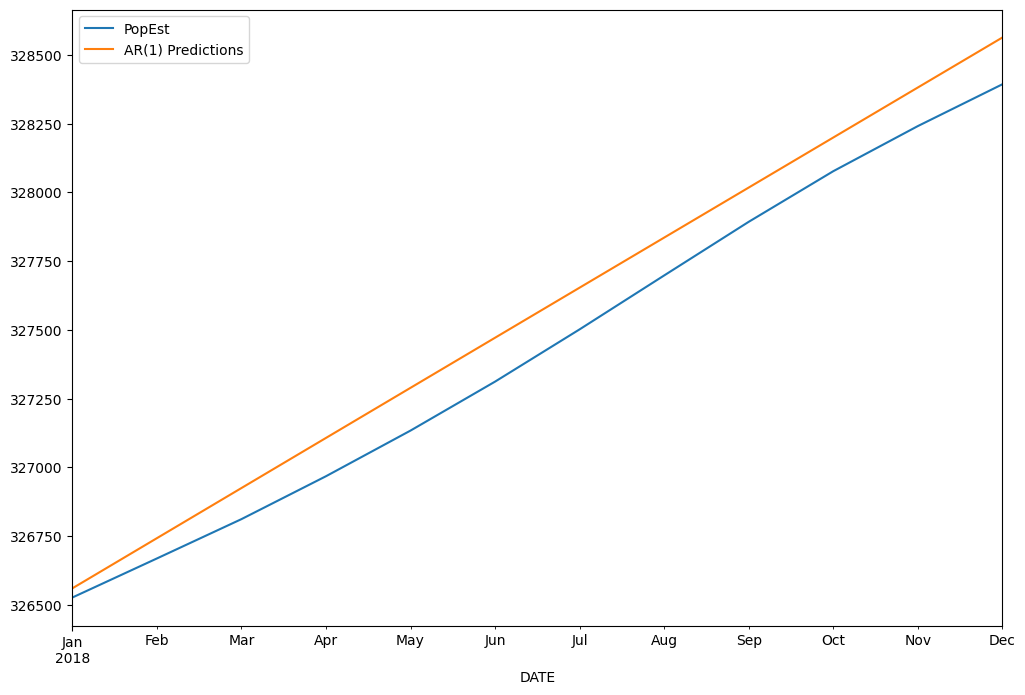

In [ ]:
test.plot(figsize=(12,8),legend=True)
predictions1.plot(legend=True);

In [ ]:
#AR Order 2

model2 = AutoReg(train['PopEst'],lags=2)
AR2fit = model2.fit()

In [ ]:
AR2fit.params

const        137.368305
PopEst.L1      1.853490
PopEst.L2     -0.853836
dtype: float64

In [ ]:
predictions2 = AR2fit.predict(start,end)

In [ ]:
predictions2 = predictions2.rename('AR (2) Predictions')

<Axes: xlabel='DATE'>

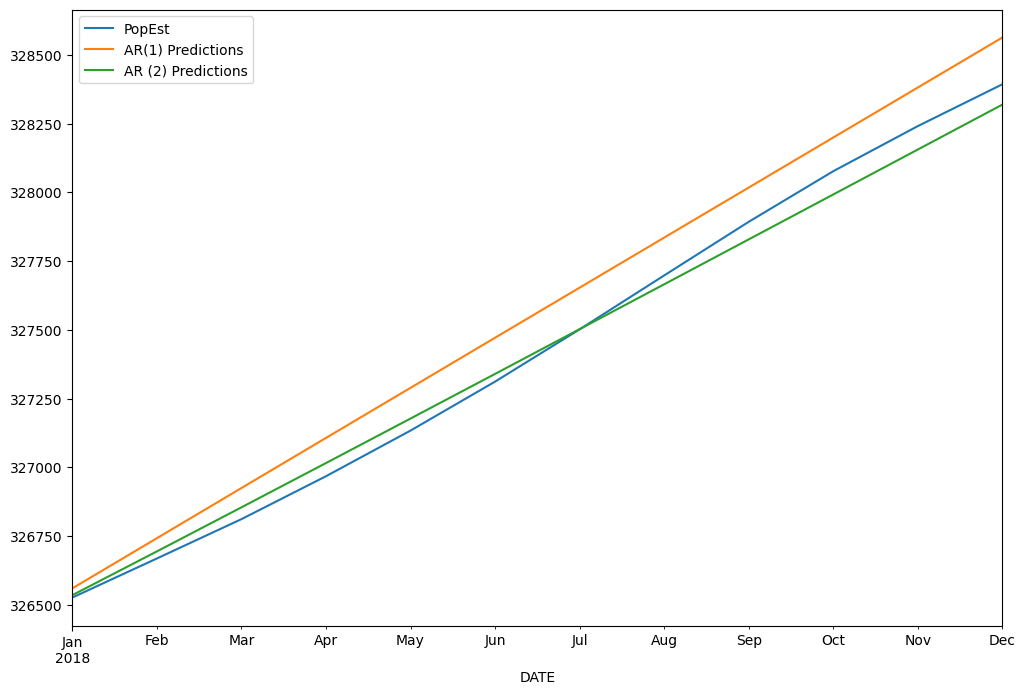

In [ ]:
test.plot(figsize=(12,8),legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True)

In [ ]:
#selecting automatically lag order

from statsmodels.tsa.ar_model import ar_select_order

sel = ar_select_order(train['PopEst'], maxlag =20, old_names=False,ic='aic')
model2 = AutoReg(train['PopEst'],lags=2)
ARfit = sel.model.fit()
print(ARfit.summary())


                            AutoReg Model Results                             
Dep. Variable:                 PopEst   No. Observations:                   84
Model:                    AutoReg(14)   Log Likelihood                -193.955
Method:               Conditional MLE   S.D. of innovations              3.865
Date:                Mon, 06 May 2024   AIC                            419.910
Time:                        09:59:17   BIC                            455.886
Sample:                    03-01-2012   HQIC                           434.200
                         - 12-01-2017                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         65.7052     45.103      1.457      0.145     -22.695     154.105
PopEst.L1      2.3791      0.115     20.742      0.000       2.154       2.604
PopEst.L2     -2.1467      0.304     -7.068      0.0

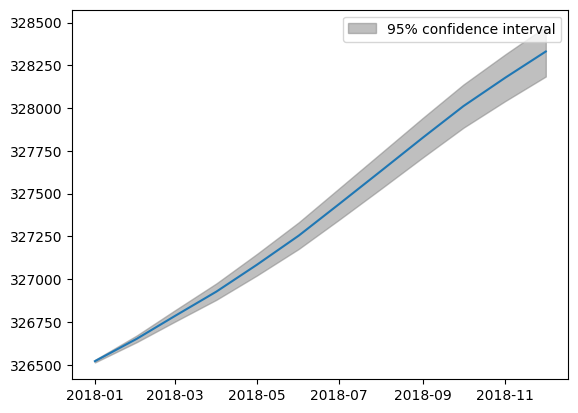

In [ ]:
fig = ARfit.plot_predict(start=start,end=end)

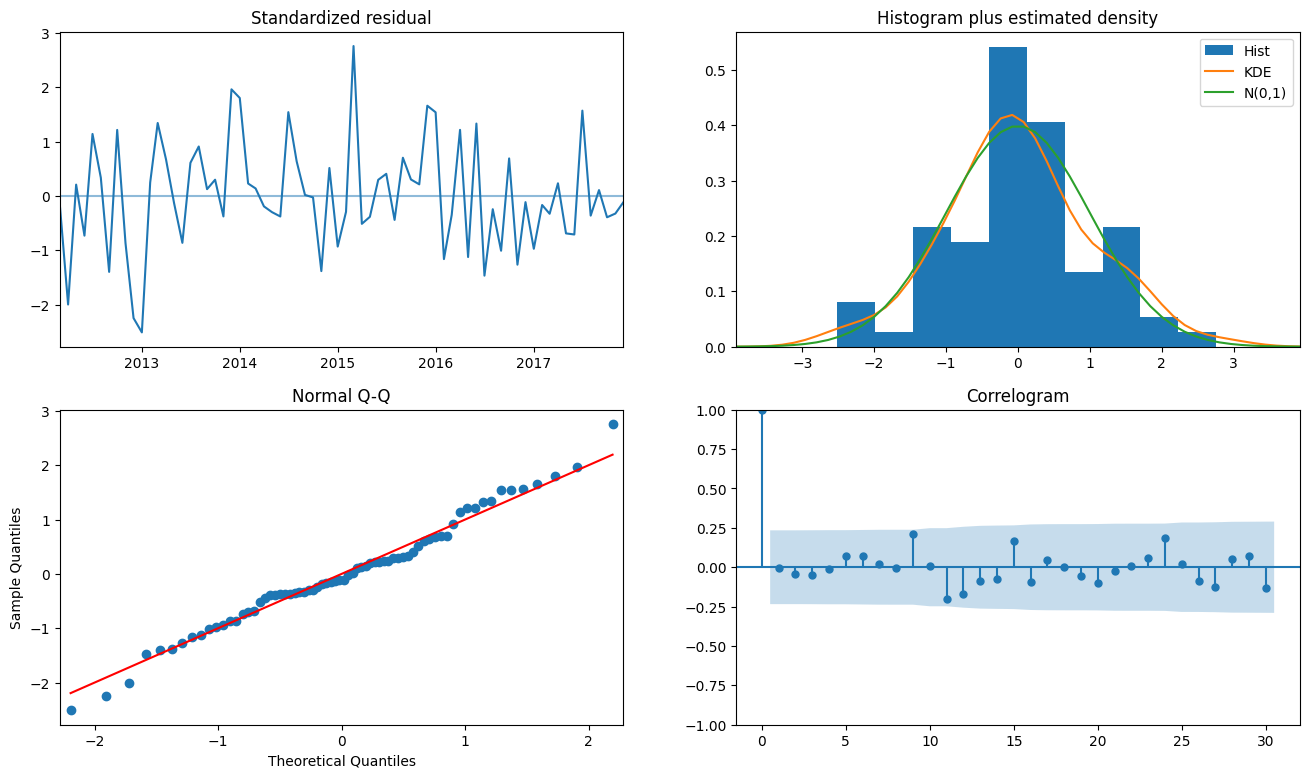

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16, 9))

fig = ARfit.plot_diagnostics(fig=fig, lags=30)

In [ ]:
from sklearn.metrics import mean_squared_error
labels = ['AR1','AR2','AR13']

#AR Order 13

model13 = AutoReg(train['PopEst'],lags=13)
AR13fit = model13.fit()
predictions13 = AR13fit.predict(start,end)
predictions13 = predictions13.rename('AR (13) Predictions')

preds = [predictions1,predictions2,predictions13]

for i in range(3):
  error = mean_squared_error(test['PopEst'],preds[i])
  print(f'{labels[i]} MSE was : {error}')

AR1 MSE was : 17449.714242014332
AR2 MSE was : 2713.2588955853353
AR13 MSE was : 9166.386336510803


In [ ]:
from sklearn.metrics import mean_squared_error
labels = ['AR1','AR2','AR13','AR6','AR7']

#AR Order 13

model13 = AutoReg(train['PopEst'],lags=13)
AR13fit = model13.fit()
predictions13 = AR13fit.predict(start,end)
predictions13 = predictions13.rename('AR (13) Predictions')

#AR Order 6

model6 = AutoReg(train['PopEst'],lags=6)
AR6fit = model6.fit()
predictions6 = AR6fit.predict(start,end)
predictions6 = predictions6.rename('AR (6) Predictions')

#AR Order 7

model7 = AutoReg(train['PopEst'],lags=7)
AR7fit = model7.fit()
predictions7 = AR7fit.predict(start,end)
predictions7 = predictions7.rename('AR (7) Predictions')

preds = [predictions1,predictions2,predictions13,predictions6,predictions7]

for i in range(len(preds)):
  error = mean_squared_error(test['PopEst'],preds[i])
  print(f'{labels[i]} MSE was : {error}')

AR1 MSE was : 17449.714242014332
AR2 MSE was : 2713.2588955853353
AR13 MSE was : 9166.386336510803
AR6 MSE was : 7522.9544261372985
AR7 MSE was : 6308.007773108955


<Axes: xlabel='DATE'>

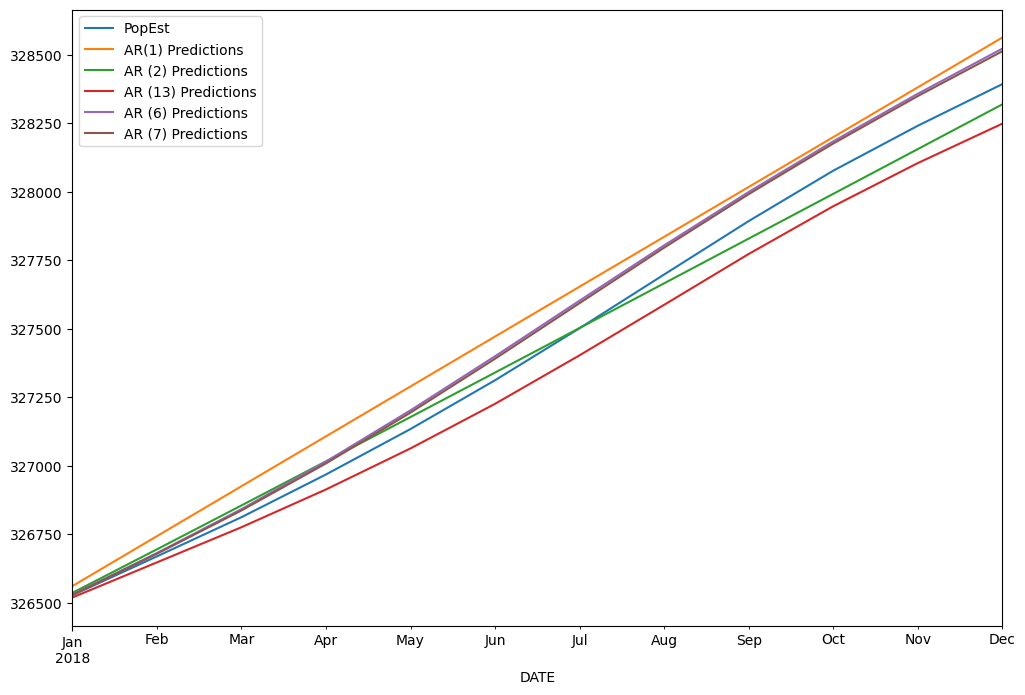

In [ ]:
test.plot(figsize=(12,8),legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True)
predictions13.plot(legend=True)
predictions6.plot(legend=True)
predictions7.plot(legend=True)

In [ ]:
#FORECASTING

model = AutoReg(df['PopEst'],lags=2)

ARfit = model.fit()

forecasted_values = ARfit.predict(start=len(df), end=len(df)+12).rename('Forecast')

<Axes: xlabel='DATE'>

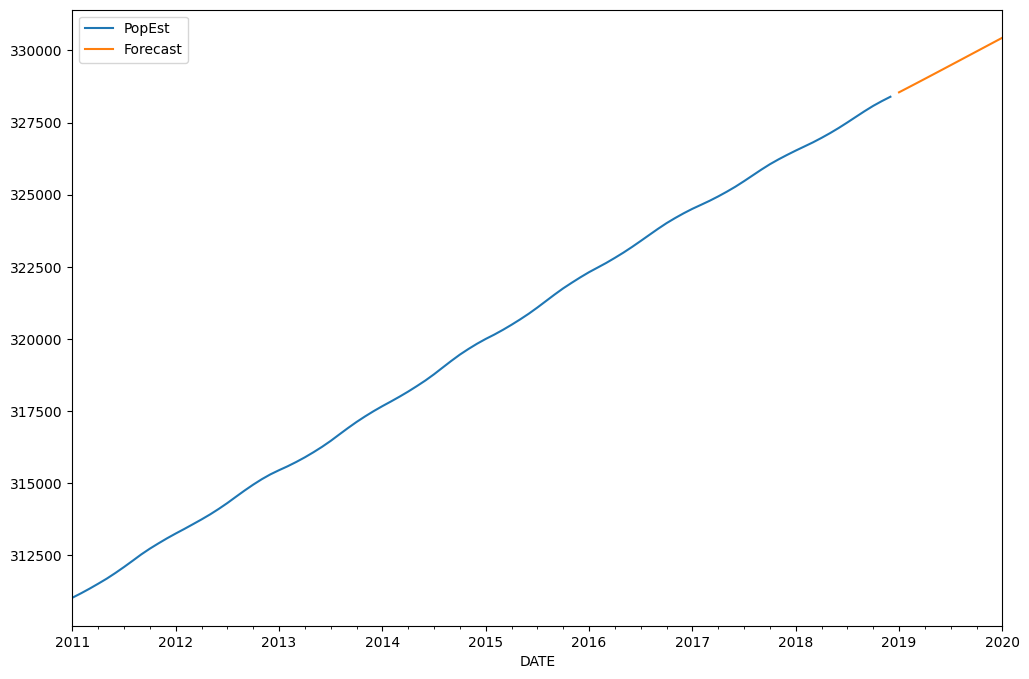

In [ ]:
df['PopEst'].plot(figsize=(12,8),legend=True)
forecasted_values.plot(legend=True)

In [ ]:
# #Dickey Fuller Test : If p value is low (less than 0.05), we reject the null hypothesis, so we assume the dataset in stationary.
# if P value if high (greater than 0.05), we fail to reject the null hypothesis.

In [ ]:
#Granger Cauality test :  It is used to determine if one timeseries is useful in forecasting another. Used to check to corellated series (causality).

In [ ]:
# AIC : Akaike Information Criterion : It evaluates a collection of models and estimates the quality of each model relative to the other.
#Penalties are provided for the number of parameters used in an effort to thwart overfitting.
#BIC :  Baysian information criterion.

# Descriptive Statistics & Tests

In [42]:
import pandas as pd
import numpy as np
%matplotlib inline

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

# Load a seasonal dataset
df1 = pd.read_csv('/content/sample_data/airline_passengers.csv',index_col='Month',parse_dates=True)
df1.index.freq = 'MS'

# Load a nonseasonal dataset
df2 = pd.read_csv('/content/sample_data/DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)
df2.index.freq = 'D'

In [45]:
from statsmodels.tsa.stattools import ccovf,ccf
from statsmodels.tsa.stattools import adfuller
from scipy.signal import periodogram

In [46]:
adfuller(df1['Thousands of Passengers'])

(0.8153688792060528,
 0.9918802434376411,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.6929308390189)

In [48]:
dftest = adfuller(df1['Thousands of Passengers'])
dfout = pd.Series(dftest[0:4],index=['ADF Test Stats','p-value','Lags Used','Observations'])

for key,val in dftest[4].items():
  dfout[f'critical value ({key})']=val

dfout

ADF Test Stats            0.815369
p-value                   0.991880
Lags Used                13.000000
Observations            130.000000
critical value (1%)      -3.481682
critical value (5%)      -2.884042
critical value (10%)     -2.578770
dtype: float64

In [49]:
#Function for Augmented Dickey Fuller Test

from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data

    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val

    print(out.to_string())          # .to_string() removes the line "dtype: float64"

    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [50]:
adf_test(df1['Thousands of Passengers'])

Augmented Dickey-Fuller Test: 
ADF test statistic        0.815369
p-value                   0.991880
# lags used              13.000000
# observations          130.000000
critical value (1%)      -3.481682
critical value (5%)      -2.884042
critical value (10%)     -2.578770
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


<Axes: xlabel='Month'>

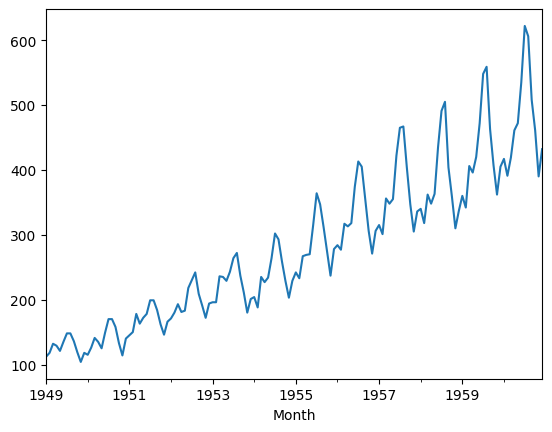

In [51]:
df1['Thousands of Passengers'].plot()

In [52]:
adf_test(df2['Births'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -4.808291
p-value                   0.000052
# lags used               6.000000
# observations          358.000000
critical value (1%)      -3.448749
critical value (5%)      -2.869647
critical value (10%)     -2.571089
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [53]:
#Grenger Causality Test
df3 = pd.read_csv('/content/sample_data/samples.csv',index_col=0,parse_dates=True)
df3.index.freq = 'MS'

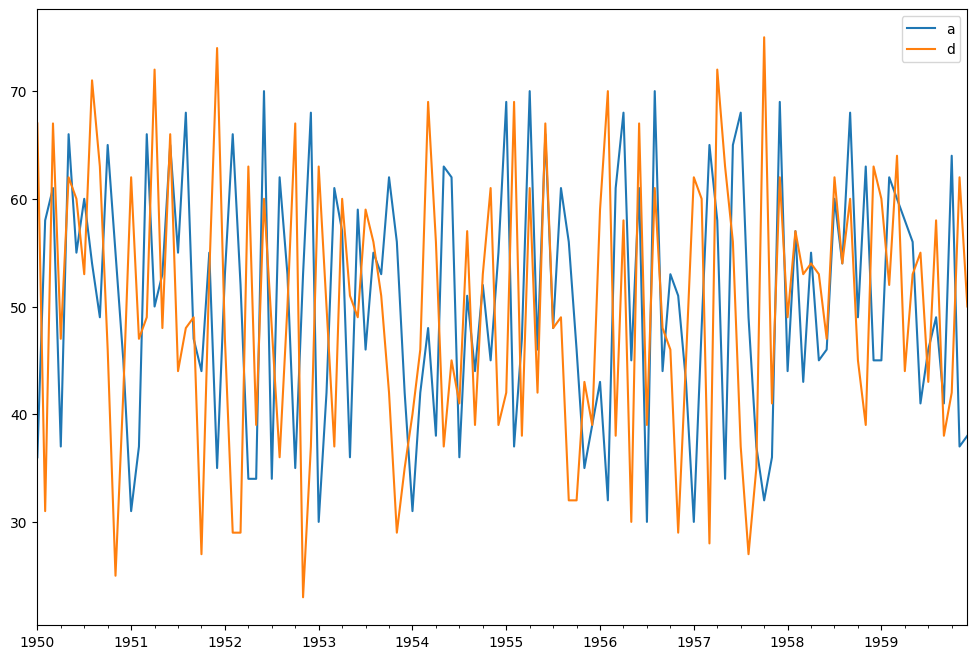

In [54]:
df3[['a','d']].plot(figsize=(12,8));

<Axes: >

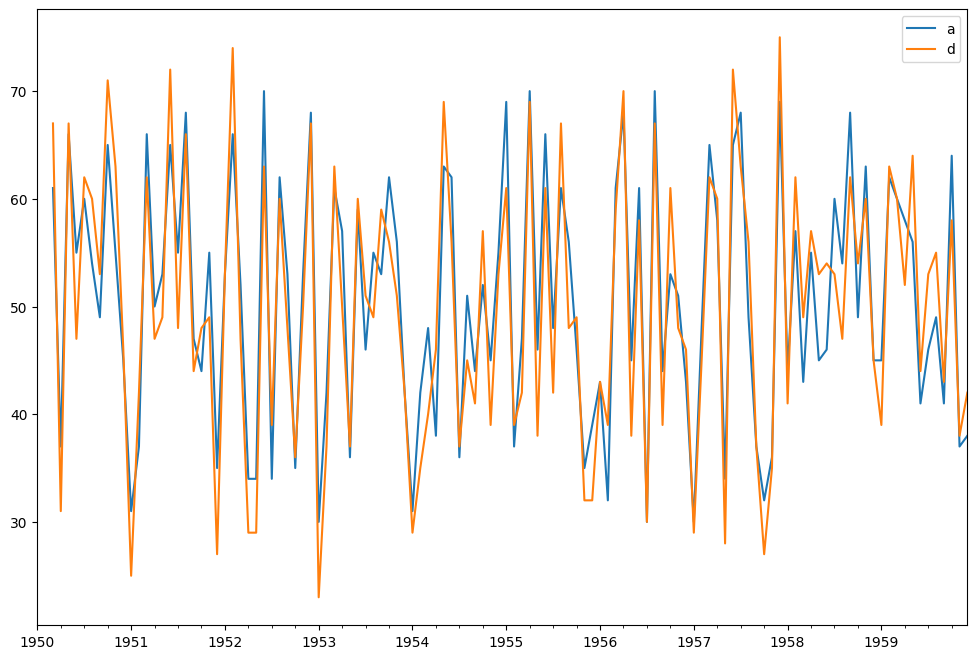

In [55]:
df3['a'].iloc[2:].plot(figsize=(12,8),legend=True)
df3['d'].shift(2).plot(legend=True)

In [56]:
from statsmodels.tsa.stattools import grangercausalitytests
grangercausalitytests(df3[['a','d']],maxlag=3);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7051  , p=0.1942  , df_denom=116, df_num=1
ssr based chi2 test:   chi2=1.7492  , p=0.1860  , df=1
likelihood ratio test: chi2=1.7365  , p=0.1876  , df=1
parameter F test:         F=1.7051  , p=0.1942  , df_denom=116, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=286.0339, p=0.0000  , df_denom=113, df_num=2
ssr based chi2 test:   chi2=597.3806, p=0.0000  , df=2
likelihood ratio test: chi2=212.6514, p=0.0000  , df=2
parameter F test:         F=286.0339, p=0.0000  , df_denom=113, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=188.7446, p=0.0000  , df_denom=110, df_num=3
ssr based chi2 test:   chi2=602.2669, p=0.0000  , df=3
likelihood ratio test: chi2=212.4789, p=0.0000  , df=3
parameter F test:         F=188.7446, p=0.0000  , df_denom=110, df_num=3


In [57]:
grangercausalitytests(df3[['b','d']],maxlag=3);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.5225  , p=0.2197  , df_denom=116, df_num=1
ssr based chi2 test:   chi2=1.5619  , p=0.2114  , df=1
likelihood ratio test: chi2=1.5517  , p=0.2129  , df=1
parameter F test:         F=1.5225  , p=0.2197  , df_denom=116, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.4350  , p=0.6483  , df_denom=113, df_num=2
ssr based chi2 test:   chi2=0.9086  , p=0.6349  , df=2
likelihood ratio test: chi2=0.9051  , p=0.6360  , df=2
parameter F test:         F=0.4350  , p=0.6483  , df_denom=113, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.5333  , p=0.6604  , df_denom=110, df_num=3
ssr based chi2 test:   chi2=1.7018  , p=0.6365  , df=3
likelihood ratio test: chi2=1.6895  , p=0.6393  , df=3
parameter F test:         F=0.5333  , p=0.6604  , df_denom=110, df_num=3


In [58]:
np.random.seed(42)
df = pd.DataFrame(np.random.randint(20,30,(50,2)),columns=['test','predictions'])
df.head()

,test,predictions
0,26,23
1,27,24
2,26,29
3,22,26
4,27,24


<Axes: >

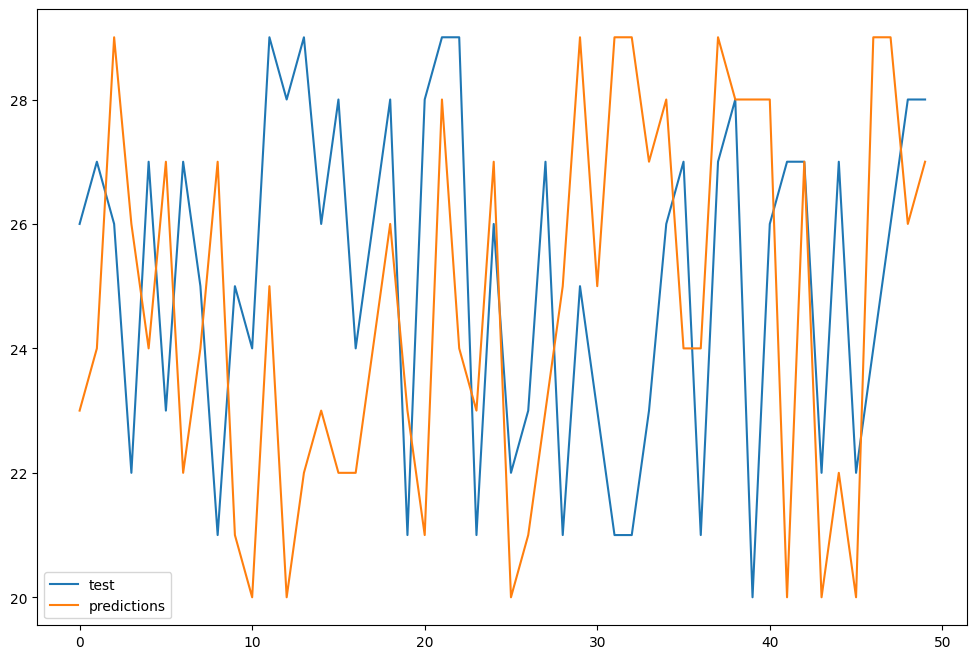

In [59]:
df.plot(figsize=(12,8))

In [60]:
from statsmodels.tools.eval_measures import mse, rmse, meanabs
mse(df['test'],df['predictions'])

17.02

In [61]:
meanabs(df['test'],df['predictions'])

3.54

In [62]:
rmse(df['test'],df['predictions'])

4.125530268947253

In [63]:
df1.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


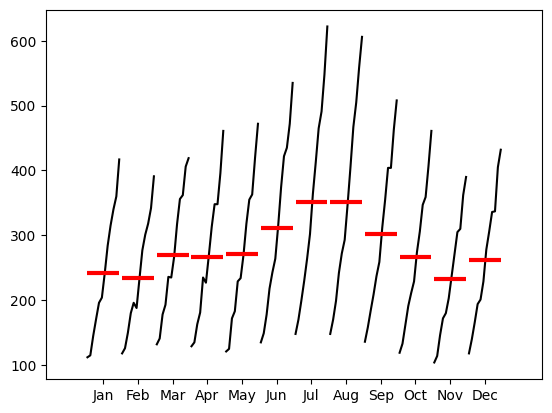

In [65]:
#finding out when the seasonaliy happening
from statsmodels.graphics.tsaplots import month_plot,quarter_plot
month_plot(df1['Thousands of Passengers']);

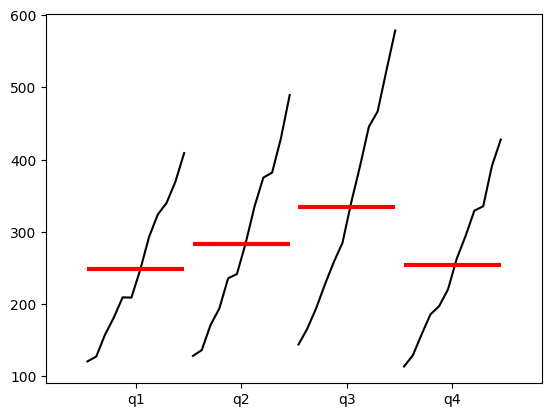

In [66]:
dfq = df1['Thousands of Passengers'].resample(rule='Q').mean()
quarter_plot(dfq);